In [39]:
# Basic Packages
import os
import re
from datetime import datetime
from collections import Counter
import glob

# Python Preprocessing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kavisanthoshkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kavisanthoshkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Merging Individual Files

In [40]:
# Directory where the CSV files are located
directory = "/Users/kavisanthoshkumar/Library/CloudStorage/OneDrive-IllinoisInstituteofTechnology/IIT Chicago Masters of Artificial Intelligence/CS579_Online_Social_Network_Analysis/GroupProject/Data/TwitterData"

# Use glob to get all CSV files in the directory
csv_files = glob.glob(os.path.join(directory, "*.csv"))

# Initialize an empty list to hold DataFrames
df_list = []

# Loop through the list of CSV files
for file in csv_files:
    if "combined_data" not in file:
        # Read each CSV file
        df = pd.read_csv(file)
        
        # Add a new column with the file name (without directory and extension)
        df['category'] = os.path.basename(file).replace('.csv', '')


        # Get the current date (or specify a date if needed)
        current_date = datetime.now().strftime("%Y-%m-%d")
        df["created_date"] = current_date
        
        # Append the DataFrame to the list
        df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file (optional)
combined_df.to_csv("combined_data.csv", index=False)


# Loading and Text Preprocessing

In [42]:
# Set the stopwords for English
stop_words = set(stopwords.words('english'))

# Function to clean text (removes URLs, hashtags, mentions, and special characters)
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'#\w+|@\w+', '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    text = text.lower()
    return text

# Function to remove stopwords from tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Load your dataset
data = pd.read_csv('combined_data.csv')

# Preprocess text
data['cleaned_text'] = data['text'].apply(clean_text)

# Tokenize and remove stopwords
data['tokens'] = data['cleaned_text'].apply(word_tokenize)
data['tokens'] = data['tokens'].apply(remove_stopwords)

# Word Tokenization

In [43]:
# Tokenize the text
data['tokens'] = data['cleaned_text'].apply(word_tokenize)

# 1. Word Cloud of Most Common Words

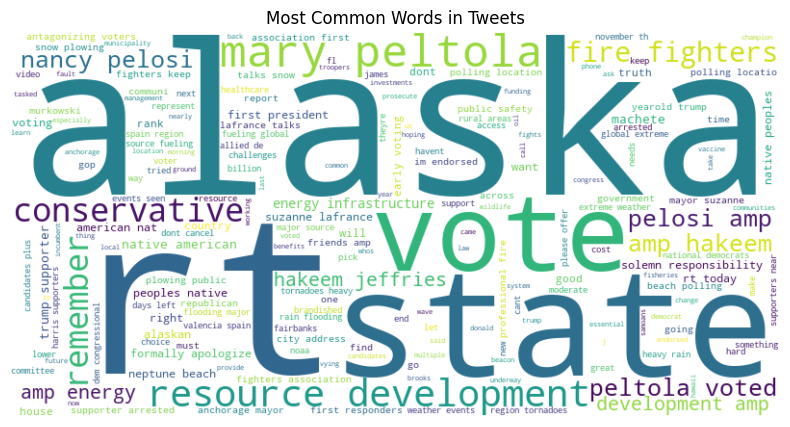

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into a single string
all_words = ' '.join(data['cleaned_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets')
plt.show()


# 2. Top N Words Bar Plot

/var/folders/_p/pgtp_zhj7n3717r3m0prtkdh0000gn/T/ipykernel_9446/3268549598.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')


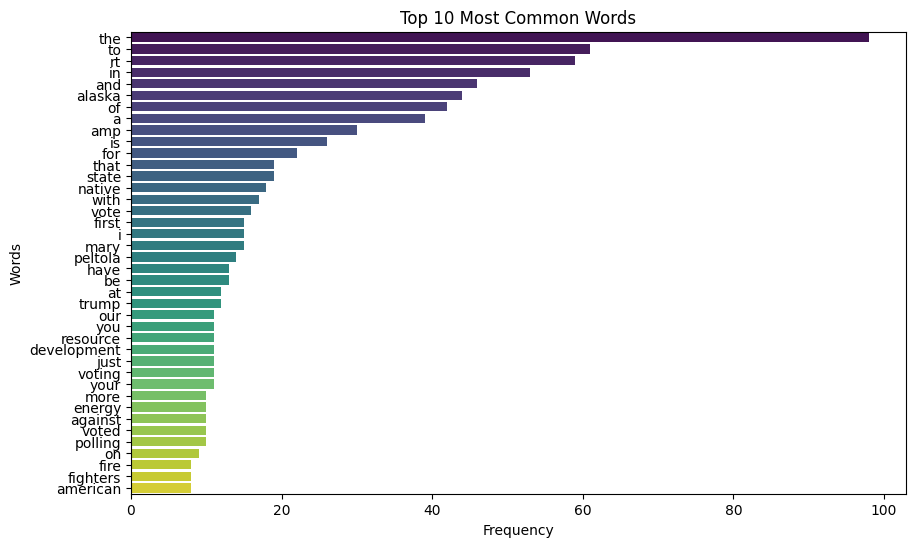

In [36]:
# Flatten the list of tokens and count word frequencies
all_tokens = [word for tokens in data['tokens'] for word in tokens]
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(40)  # Adjust this number for top N words

# Create a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')
plt.title('Top 10 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


# 3. Tweet Length Distribution

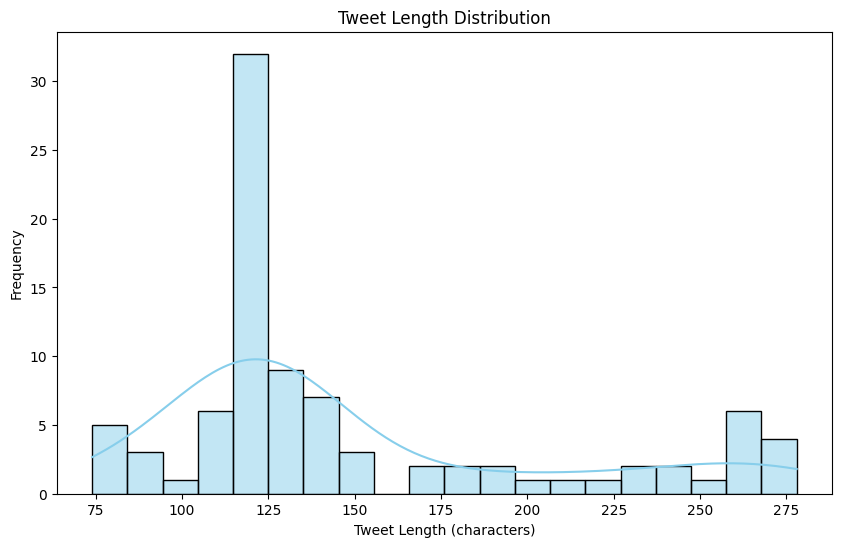

In [45]:
# Calculate the length of each tweet
data['tweet_length'] = data['cleaned_text'].apply(len)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['tweet_length'], bins=20, kde=True, color='skyblue')
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()


# Most Common Political Hashtags

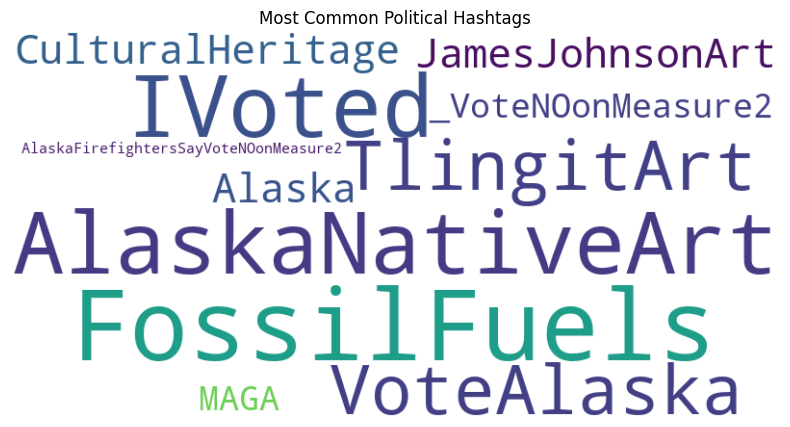

In [46]:
from wordcloud import WordCloud

# Extract hashtags from the text
data['hashtags'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word.startswith('#')]))

# Combine all hashtags into a single string
all_hashtags = ' '.join(data['hashtags'])

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Political Hashtags')
plt.show()
